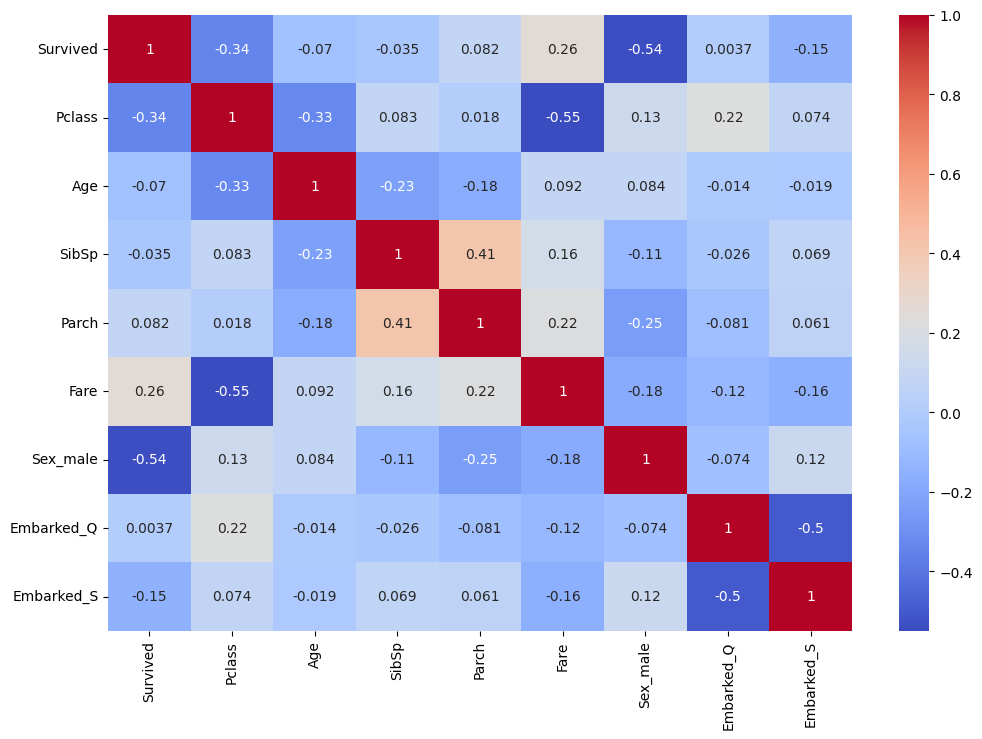

Confusion Matrix:
[[90 15]
 [20 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179


Accuracy Score:
0.8044692737430168


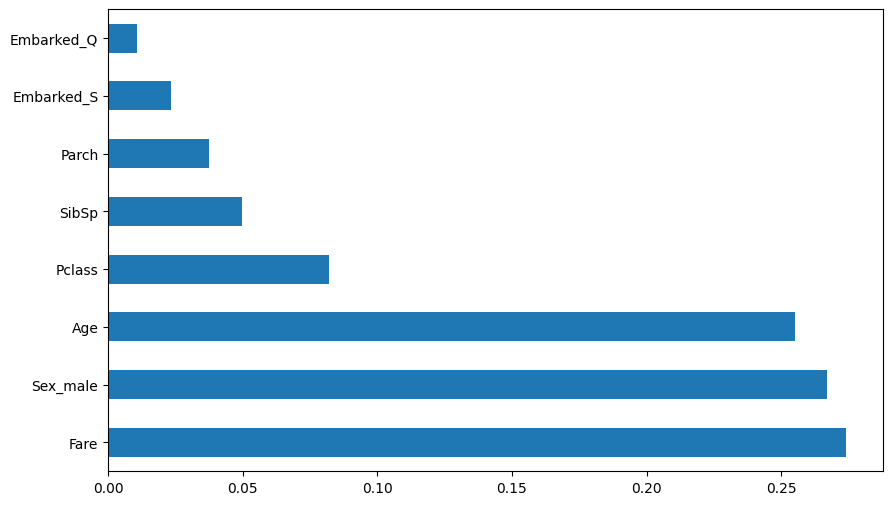

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Load the dataset
# Make sure to have the dataset downloaded and in the same directory or provide the correct path
titanic_data = pd.read_csv("/content/Titanic-Dataset.csv")

# Step 3: Data preprocessing
# Handling missing values
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data.drop('Cabin', axis=1, inplace=True)  # Dropping 'Cabin' column due to too many missing values

# Converting categorical variables into numerical variables
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

# Dropping columns that won't be used in the model
titanic_data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# Step 4: Exploratory data analysis (EDA)
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(titanic_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Step 5: Model building
# Splitting the data into training and testing sets
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Model evaluation
# Predicting the test set results
y_pred = model.predict(X_test)

# Evaluation metrics
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

# Feature importance
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()
